# FCFS-Scheduling 

In [1]:
# Datenzugriff
from configs.path_manager import get_path

# Utils
import src.utils.presenter as show
from src.utils.production_process import convert
from src.utils.production_process import initialize as init
from src.utils.analize import check_constrains as check

# Solver Model
from src.models.heuristics import fcfs

# Extern
import pandas as pd

In [3]:
# Datei laden
basic_data_path = get_path("data", "basic")
df_instance = pd.read_csv(basic_data_path / "instance.csv")
df_instance

,Routing_ID,Operation,Machine,Processing Time
0,0,0,M00,29
1,0,1,M01,78
2,0,2,M02,9
3,0,3,M03,36
4,0,4,M04,49
...,...,...,...,...
95,9,5,M09,76
96,9,6,M05,47
97,9,7,M03,52
98,9,8,M04,90


In [12]:
df_jssp, df_jobs_arrivals = init.create_jobs_for_shifts(df_routings = df_instance,
                                                        routing_column = "Routing_ID", job_column = "Job",
                                                        shift_count = 1, shift_length = 1440,
                                                        u_b_mmax = 0.98, shuffle = True
                                                       )
df_jobs_arrivals

,Job,Routing_ID,Arrival,Ready Time
0,0,8,72,1440
1,1,6,119,1440
2,2,0,182,1440
3,3,2,223,1440
4,4,3,263,1440
5,5,1,457,1440
6,6,9,726,1440
7,7,5,850,1440
8,8,4,907,1440
9,9,7,922,1440


In [13]:
df_schedule = fcfs.schedule_with_arrivals(df_jssp, df_jobs_arrivals)
df_schedule


Schedule-Informationen:
  Makespan: 2166


,Job,Operation,Arrival,Machine,Start,Processing Time,End
0,0,0,72,M00,72,76,148
1,0,1,72,M01,165,69,234
2,0,2,72,M03,263,76,339
3,0,3,72,M05,339,51,390
4,0,4,72,M02,390,85,475
...,...,...,...,...,...,...,...
165,16,5,1377,M05,1804,21,1825
166,16,6,1377,M09,1960,32,1992
167,16,7,1377,M08,1992,89,2081
168,16,8,1377,M07,2081,30,2111


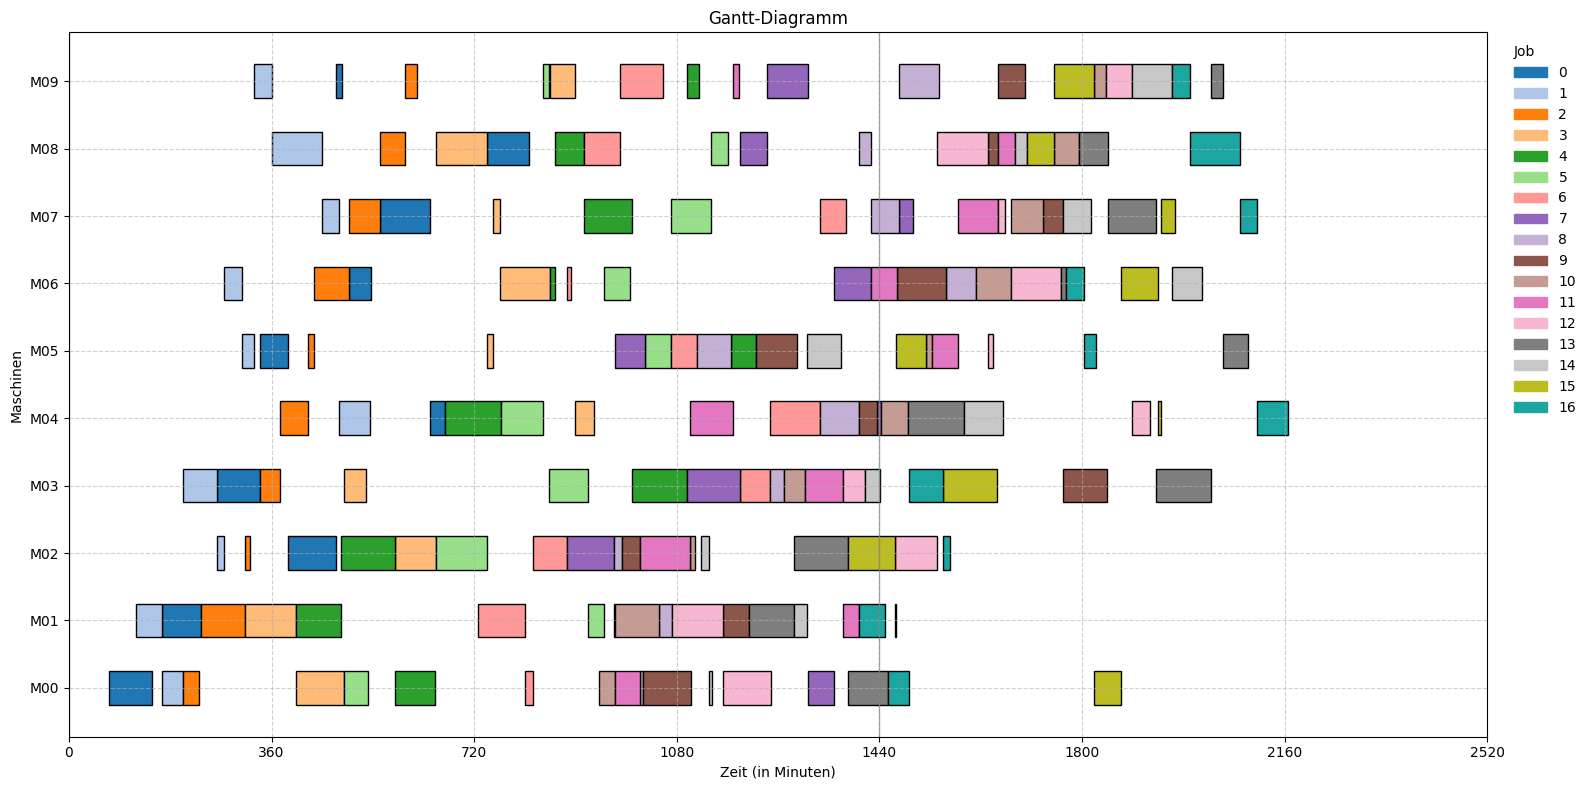

+ Keine Maschinenkonflikte gefunden
+ Alle Gruppen wurden in korrekter Operationsreihenfolge ausgeführt.
+ Alle technologischen Abhängigkeiten wurden eingehalten.


True

In [14]:
show.plot_gantt(df_schedule, perspective="Machine")
check.is_machine_conflict_free(df_schedule)
check.is_operation_sequence_correct(df_schedule)
check.is_job_timing_correct(df_schedule)